# Machine Learning Project with Python: Building Recommender System

Terdapat 2 dasar tipe sistem rekomendasi:

1. Sistem Rekomendasi Sederhana
2. Sistem Rekomendasi Berdasarkan Konten dari Fiturnya
 
Sistem Rekomendasi Sederhana, adalah sistem rekomendasi yang hanya menggunakan urutan sebagai dasar perhitungannya, yang biasanya digunakan dalam '5 film terbaik' kita akan menggunakan urutan berdasarkan mungkin vote terbanyak, rating tertinggi, penjualan film paling tinggi, atau apapun yang lain.

Dalam kasus ini, kita akan menggunakan kombinasi antara rata-rata rating, jumlah vote, dan membentuk metric baru dari metric yang sudah ada, kemudian kita akan melakukan sorting untuk metric ini dari yang tertinggi ke terendah.

__Simple Recommender Engine using Weighted Average__

Simple Recommender Engine menawarkan rekomendasi yang umum untuk semua user berdasarkan popularitas film dan terkadang genre.

Ide awal di balik sistem rekomendasi ini adalah sebagai berikut.

1. Film-film yang lebih populer akan memiliki kemungkinan yang lebih besar untuk disukai juga oleh rata-rata penonton.
2. Model ini tidak memberikan rekomendasi yang personal untuk setiap tipe user. 
3. Implementasi model ini pun juga bisa dibilang cukup mudah, yang perlu kita lakukan hanyalah mengurutkan film-film tersebut berdasarkan rating dan popularitas dan menunjukkan film teratas dari list film tersebut.

Sebagai tambahan, kita dapat menambahkan genre untuk mendapatkan film teratas untuk genre spesifik tersebut

## Library Import and File Unloading

In [1]:
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
os.listdir('dataset/')

['title.basics.tsv', 'title.ratings.tsv']

In [3]:
movie_df = pd.read_csv("dataset/title.basics.tsv", sep='\t')
rating_df = pd.read_csv("dataset/title.ratings.tsv", sep='\t')

## Cleaning Table Movie

In [4]:
#Tampilkan 5 data teratas
movie_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,\N,\N,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,\N,\N,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,\N,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,\N,\N,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,\N,\N,Documentary


In [5]:
# menampilkan jumlah baris dan kolom pada data
movie_df.shape

(9025, 9)

In [6]:
# pengecekan info data dari setiap kolom
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          9025 non-null   object
 1   titleType       9025 non-null   object
 2   primaryTitle    9011 non-null   object
 3   originalTitle   9011 non-null   object
 4   isAdult         9025 non-null   int64 
 5   startYear       9025 non-null   object
 6   endYear         9025 non-null   object
 7   runtimeMinutes  9025 non-null   object
 8   genres          9014 non-null   object
dtypes: int64(1), object(8)
memory usage: 634.7+ KB


In [7]:
# pengecekan missing value pada data
movie_df.isnull().sum()

tconst             0
titleType          0
primaryTitle      14
originalTitle     14
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            11
dtype: int64

### Analisis Kolom dengan data bernilai NULL

Dari hasil pengecekan nilai NULL yang sudah dilakukan sebelumnya, diketahui bahwa kolom primaryTitle dan originalTitle memiliki banyak data yang bernilai NULL.

Selain kolom 'primaryTitle' dan 'originalTitle', masih terdapat kolom lain yang memiliki data bernilai NULL. Kolom tersebut adalah kolom 'genres'.

Hal selanjutnya yang akan kita lakukan adalah melakukan pengecekan terhadap bentuk data dari kolom primaryTitle dan originalTitle, serta genres yang bernilai NULL.

In [8]:
# periksa data dari kolom primaryTitle dan originalTitle yang bernilai NULL
movie_df.loc[(movie_df['primaryTitle'].isnull()) | (movie_df['originalTitle'].isnull())]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9000,tt10790040,tvEpisode,NaN,NaN,0,2019,\N,\N,\N
9001,tt10891902,tvEpisode,NaN,NaN,0,2020,\N,\N,Crime
9002,tt11737860,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9003,tt11737862,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9004,tt11737866,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9005,tt11737872,tvEpisode,NaN,NaN,0,2020,\N,\N,\N
9006,tt11737874,tvEpisode,NaN,NaN,0,2020,\N,\N,"Comedy,Drama,Romance"
9007,tt1971246,tvEpisode,NaN,NaN,0,2011,\N,\N,Biography
9008,tt2067043,tvEpisode,NaN,NaN,0,1965,\N,\N,Music
9009,tt4404732,tvEpisode,NaN,NaN,0,2015,\N,\N,Comedy


In [9]:
# periksa data dari kolom genres yang bernilai NULL
movie_df.loc[movie_df['genres'].isnull()]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
9014,tt10233364,tvEpisode,Rolling in the Deep Dish\tRolling in the Deep ...,0,2019,\N,\N,Reality-TV,NaN
9015,tt10925142,tvEpisode,The IMDb Show on Location: Star Wars Galaxy's ...,0,2019,\N,\N,Talk-Show,NaN
9016,tt10970874,tvEpisode,Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...,0,2019,\N,\N,\N,NaN
9017,tt11670006,tvEpisode,...ein angenehmer Unbequemer...\t...ein angene...,0,1981,\N,\N,Documentary,NaN
9018,tt11868642,tvEpisode,GGN Heavyweight Championship Lungs With Mike T...,0,2020,\N,\N,Talk-Show,NaN
9019,tt2347742,tvEpisode,No sufras por la alergia esta primavera\tNo su...,0,2004,\N,\N,\N,NaN
9020,tt3984412,tvEpisode,"I'm Not Going to Come Last, I'm Just Going to ...",0,2014,\N,\N,Reality-TV,NaN
9021,tt8740950,tvEpisode,Weight Loss Resolution Restart - Ins & Outs of...,0,2015,\N,\N,Reality-TV,NaN
9022,tt9822816,tvEpisode,Zwischen Vertuschung und Aufklärung - Missbrau...,0,2019,\N,\N,\N,NaN
9023,tt9900062,tvEpisode,The Direction of Yuu's Love: Hings Aren't Goin...,0,1994,\N,\N,"Animation,Comedy,Drama",NaN


### Membuang data dengan nilai NULL

Setelah melihat hasil sebelumnya, dapat dilihat bahwa semua data tidak memiliki judul dan kita dapat membuang data-data tersebut.

Pekerjaan selanjutnya yang akan kita lakukan adalah membuang data dengan nilai NULL tersebut dan melihat jumlah data yang ada setelah data-data bernilai NULL tersebut dibuang. 

In [10]:
# membuang data-data bernilai NULL pada kolom primaryTitle dan originalTitle
movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]
# movie_df.drop(index=np.arange(9000,9014), inplace=True)

# menampilkan jumlah data setelah data dengan nilai NULL dibuang
len(movie_df)

9011

In [11]:
# membuang data-data bernilai NULL pada kolom genres
movie_df = movie_df.loc[movie_df['genres'].notnull()]

# menampilkan jumlah data setelah data dengan nilai NULL dibuang
len(movie_df)

9000

### Mengubah Nilai '\\N'

Jika kita perhatikan pada kolom 'startYear' , 'endYear', dan 'runtimeMinutes', terdapat data dengan nilai '\\\N'

'\\\N' berarti NULL.

Hal selanjutnya yang akan kita lakukan adalah mengubah nilai dari \\\N tersebur menjadi np.nan dan melakukan casting kolom startYear, endYear, dan runtimeMinutes menjadi float64.

In [12]:
#mengubah nilai '\\N' pada startYear menjadi np.nan dan cast kolomnya menjadi int64
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
movie_df['startYear'].unique()[:5]

array([1898., 2018., 2016., 1987., 1973.])

In [13]:
#mengubah nilai '\\N' pada endYear menjadi np.nan dan cast kolomnya menjadi int64
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
movie_df['endYear'].unique()[:5]

array([  nan, 2005., 1955., 2006., 1999.])

In [14]:
#mengubah nilai '\\N' pada runtimeMinutes menjadi np.nan dan cast kolomnya menjadi float64
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')
movie_df['runtimeMinutes'].unique()[:5]

array([nan, 29.,  7., 23., 85.])

### Mengubah nilai genres menjadi list

Selanjutnya, kita akan membuat sebuah function yang bernama transform_to_list untuk mengubah nilai genre menjadi list. 

In [15]:
""" fungsi untuk mengubah nilai genre menjadi list """
def transform_to_list(x):
    if ',' in x:
        # ubah menjadi list apabila ada data pada kolom genre
        return x.split(',')
    else:
        # jika tidak ada data, ubah menjadi list kosong
        return []
    
movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))
movie_df['genres'][:5]

0    [Documentary, Short]
1         [Comedy, Drama]
2     [Comedy, Game-Show]
3                      []
4                      []
Name: genres, dtype: object

## Cleaning table ratings

In [16]:
# menampilkan 5 data teratas
rating_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1608
1,tt0000002,6.0,197
2,tt0000003,6.5,1285
3,tt0000004,6.1,121
4,tt0000005,6.1,2050


In [17]:
rating_df.shape

(1030009, 3)

In [18]:
# pengecekan info data dari setiap kolom
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030009 entries, 0 to 1030008
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1030009 non-null  object 
 1   averageRating  1030009 non-null  float64
 2   numVotes       1030009 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ MB


dapat dilihat bahwa tidak ada data yang bernilai NULL

## Joining table movie and table ratings

### Inner Join table movie dan table rating

Mari kita melakukan inner join antara rating_df dan movie_df untuk mendapatkan rating pada setiap film yang tersedia, lalu tampilkan 5 data teratas dan tipe data dari tiap kolom yang ada. 

In [19]:
# lakukan join pada kedua table
movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')

#Tampilkan 5 data teratas
movie_rating_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0043745,short,Lion Down,Lion Down,0,1951.0,NaN,7.0,"[Animation, Comedy, Family]",7.1,459
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,NaN,85.0,[],5.7,7
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017.0,NaN,22.0,"[Adventure, Animation, Comedy]",8.5,240
3,tt6941700,tvEpisode,RuPaul Roast,RuPaul Roast,0,2017.0,NaN,NaN,[],8.0,11
4,tt7305674,video,UCLA Track & Field Promo,UCLA Track & Field Promo,0,2017.0,NaN,NaN,"[Short, Sport]",9.7,7


In [20]:
# tampilkan tipe data dari tiap kolom
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376 entries, 0 to 1375
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1376 non-null   object 
 1   titleType       1376 non-null   object 
 2   primaryTitle    1376 non-null   object 
 3   originalTitle   1376 non-null   object 
 4   isAdult         1376 non-null   int64  
 5   startYear       1376 non-null   float64
 6   endYear         26 non-null     float64
 7   runtimeMinutes  1004 non-null   float64
 8   genres          1376 non-null   object 
 9   averageRating   1376 non-null   float64
 10  numVotes        1376 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 129.0+ KB


### Memperkecil ukuran Table

Hal selanjutnya yang akan kita lakukan adalah memperkecil ukuran table dengan menghilangkan semua nilai NULL dari kolom startYear dan runtimeMinutes karena tidak masuk akal jikalau film tersebut tidak diketahui kapan tahun rilis dan durasi nya. 

In [21]:
# menggunakan dropna untuk menghilangkan nilai NULL
movie_rating_df = movie_rating_df.dropna(subset=['startYear', 'runtimeMinutes'])

# tampilkan tipe data dari tiap kolom
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1374
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1004 non-null   object 
 1   titleType       1004 non-null   object 
 2   primaryTitle    1004 non-null   object 
 3   originalTitle   1004 non-null   object 
 4   isAdult         1004 non-null   int64  
 5   startYear       1004 non-null   float64
 6   endYear         17 non-null     float64
 7   runtimeMinutes  1004 non-null   float64
 8   genres          1004 non-null   object 
 9   averageRating   1004 non-null   float64
 10  numVotes        1004 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 94.1+ KB


## Building Simple Recommender System

__Formula dari IMDb dengan Weighted Rating__
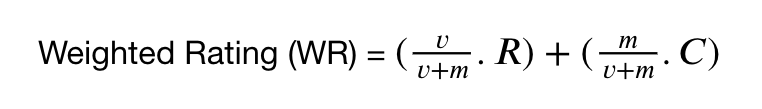

dimana,

v : __jumlah votes__ untuk film tersebut </br>
m : __jumlah minimum votes__ yang dibutuhkan supaya dapat masuk dalam chart</br>
R : __rata-rata rating__ dari film tersebut</br>
C : __rata-rata jumlah votes__ dari seluruh semesta film</br>

### Mencari nilai C

Hal pertama yang akan kita cari adalah nilai dari C yang merupakan rata-rata dari averageRating

In [22]:
# c = movie_rating_df['averageRating'].sum() / len(movie_rating_df['averageRating'])
C = movie_rating_df['averageRating'].mean()
C

6.829581673306767

### Mencari nilai m

Mari kita ambil contoh film dengan numVotes di atas 80% populasi, jadi populasi yang akan kita ambil hanya sebesar 20%. 

In [23]:
# ambil jumlah votes diatas 80%
m = movie_rating_df['numVotes'].quantile(0.8)
m

229.0

### Membuat fungsi weighted formula

Selanjutnya kita harus membuat sebuah fungsi dengan menggunakan dataframe sebagai variable. 

In [24]:
def imdb_weighted_rating(df, var=0.8):
    v = movie_rating_df['numVotes']
    R = movie_rating_df['averageRating']
    C = movie_rating_df['averageRating'].mean()
    M = movie_rating_df['numVotes'].quantile(var)
    df['score'] = (v/(v+m))*R + (m/(v+m))*C # rumus IMDb
    return df['score']

imdb_weighted_rating(movie_rating_df)

# melakukan pengecekan dataframe
movie_rating_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
0,tt0043745,short,Lion Down,Lion Down,0,1951.0,NaN,7.0,"[Animation, Comedy, Family]",7.1,459,7.009992
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,NaN,85.0,[],5.7,7,6.796077
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017.0,NaN,22.0,"[Adventure, Animation, Comedy]",8.5,240,7.684380
5,tt2262289,movie,The Pin,The Pin,0,2013.0,NaN,85.0,[],7.7,27,6.921384
6,tt0874027,tvEpisode,Episode #32.9,Episode #32.9,0,2006.0,NaN,29.0,"[Comedy, Game-Show, News]",8.0,8,6.869089


### Membuat simple recommender system

filter numVotes yang lebih dari m kemudian diurutkan score dari tertinggi ke terendah untuk diambil nilai beberapa nilai teratas

In [25]:
def simple_recommender(df, top=100):
    df = df.loc[df['numVotes'] >= m]                 # filter numVotes yang lebih dari m
    df = df.sort_values(by='score', ascending=False) # urutkan dari nilai tertinggi ke terendah
    
    # ambil 100 data teratas
    df = df[:top]
    return df

simple_recommender(movie_rating_df, top=25)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
68,tt4110822,tvEpisode,S.O.S. Part 2,S.O.S. Part 2,0,2015.0,NaN,43.0,"[Action, Adventure, Drama]",9.4,3820,9.254624
236,tt2200252,video,Attack of the Clones Review,Attack of the Clones Review,0,2010.0,NaN,86.0,[],9.3,1411,8.955045
1181,tt7697962,tvEpisode,Chapter Seventeen: The Missionaries,Chapter Seventeen: The Missionaries,0,2019.0,NaN,54.0,"[Drama, Fantasy, Horror]",9.2,1536,8.892450
326,tt7124590,tvEpisode,Chapter Thirty-Four: Judgment Night,Chapter Thirty-Four: Judgment Night,0,2018.0,NaN,42.0,"[Crime, Drama, Mystery]",9.1,1859,8.850993
1045,tt0533506,tvEpisode,The Prom,The Prom,0,1999.0,NaN,60.0,"[Action, Drama, Fantasy]",8.9,2740,8.740308
71,tt8399426,tvEpisode,Savages,Savages,0,2018.0,NaN,58.0,"[Drama, Fantasy, Romance]",9.0,1428,8.700045
1234,tt2843830,tvEpisode,VIII.,VIII.,0,2014.0,NaN,57.0,"[Adventure, Drama]",8.9,1753,8.660784
1087,tt4295140,tvSeries,Chef's Table,Chef's Table,0,2015.0,NaN,50.0,[],8.6,12056,8.566998
1054,tt2503932,tvEpisode,Trial and Error,Trial and Error,0,2013.0,NaN,43.0,"[Drama, Fantasy, Horror]",8.6,2495,8.451165
448,tt0337566,video,AC/DC: Live at Donington,AC/DC: Live at Donington,0,1992.0,NaN,120.0,"[Documentary, Music]",8.5,1343,8.256663


### Membuat simple recommender system dengan user preferences

Dari task yang sudah dilakukan sebelumnya, dapat dilihat sekarang daftar film telah diurutkan dari score tertinggi ke terendah.

Film dengan averageRating yang tinggi tidak selalu mendapat posisi yang lebih tinggi dibanding film dengan averageRating lebih rendah, hal ini disebabkan karena kita juga memperhitungkan faktor banyaknya votes


Sistem rekomendasi ini masih bisa ditingkatkan dengan menambah filter spesifik tentang titleType, startYear, ataupun filter yang lain

Pekerjaan selanjutnya yang akan kita lakukan adalah membuat function untuk melakukan filter berdasarkan isAdult, startYear, dan genres. 

In [45]:
df = movie_rating_df.copy()

def user_prefer_recommender(df, ask_adult, ask_start_year, ask_genre, top=100):
    # ask_adult = yes/no
    if ask_adult.lower() == 'yes':
        df = df.loc[df['isAdult'] == 1]
    elif ask_adult.lower() == 'no':
        df = df.loc[df['isAdult'] == 0]

    # ask_start_year = numeric
    df = df.loc[df['startYear'] >= int(ask_start_year)]

    # ask_genre = 'all' atau yang lain
    if ask_genre.lower() == 'all':
        df = df
    else:
        def filter_genre(x):
            if ask_genre.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['genres'].apply(lambda x: filter_genre(x))]
    
    df = df.loc[df['numVotes'] >= m] # Mengambil film dengan numVotes yang lebih besar atau sama dengan nilai m 
    df.sort_values(by='score', ascending=False)
    
    # jika kamu hanya ingin mengambil 100 teratas
    df = df[:top]
    return df
    
# user_prefer_recommender(df,
#                         ask_adult = 'no',
#                         ask_start_year = 2000,
#                         ask_genre = 'drama'
#                        )

In [49]:
# mencari film dengan user preference berdasarkan user input
ask_adult = input('yes/no: ')
ask_start_year = int(input('year (numeric): '))
ask_genre = input('genre: ')

user_prefer_recommender(df,
                        ask_adult,
                        ask_start_year,
                        ask_genre,
                       )

yes/no: no
year (numeric): 2010
genre: drama


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
68,tt4110822,tvEpisode,S.O.S. Part 2,S.O.S. Part 2,0,2015.0,NaN,43.0,"[Action, Adventure, Drama]",9.4,3820,9.254624
71,tt8399426,tvEpisode,Savages,Savages,0,2018.0,NaN,58.0,"[Drama, Fantasy, Romance]",9.0,1428,8.700045
109,tt1753383,movie,A Dog's Purpose,A Dog's Purpose,0,2017.0,NaN,100.0,"[Adventure, Comedy, Drama]",7.2,61521,7.198626
151,tt3954426,tvEpisode,Bleeding Kansas,Bleeding Kansas,0,2014.0,NaN,42.0,"[Drama, Western]",8.6,437,7.991253
299,tt4527626,tvEpisode,His Troubled Thoughts,His Troubled Thoughts,0,2016.0,NaN,59.0,"[Crime, Drama, Thriller]",7.5,859,7.358892
326,tt7124590,tvEpisode,Chapter Thirty-Four: Judgment Night,Chapter Thirty-Four: Judgment Night,0,2018.0,NaN,42.0,"[Crime, Drama, Mystery]",9.1,1859,8.850993
357,tt4084774,tvEpisode,Trial and Punishment,Trial and Punishment,0,2015.0,NaN,56.0,"[Adventure, Drama]",8.8,289,7.928908
462,tt5197828,tvEpisode,Right,Right,0,2016.0,NaN,42.0,"[Crime, Drama, Mystery]",6.5,641,6.586752
550,tt8163822,short,The Neighbors' Window,The Neighbors' Window,0,2019.0,NaN,21.0,"[Drama, Short]",7.2,2222,7.165391
605,tt9141176,tvEpisode,59 horas desaparecido,59 horas desaparecido,0,2019.0,NaN,48.0,"[Crime, Drama, Thriller]",8.1,674,7.777823
